# Sect 42: Graph Theory

## Learning Objectives:
- To learn the theory behind Graph Theory 
    - What are the components of a graph?
    - Learn about different measures of centrality

- To apply graph theory in 2 examples
    - Social application
    - Node Centrality Lab: Game of Thrones 

# Intro to Graph Theory

>A "Graph" in mathematical and computer science terms consists of "Nodes" or "Vertices". Nodes/Vertices may or may not be connected with one another. The connecting line between two nodes is called an "edge". 

- Linked Refs:
    - [Graph Theory Basics](https://www.geeksforgeeks.org/mathematics-graph-theory-basics-set-1/)
    - [A Gentle Intro to Graph Theory](https://medium.com/basecs/a-gentle-introduction-to-graph-theory-77969829ead8)
    
    
   <img src="https://raw.githubusercontent.com/learn-co-students/dsc-intro-graph-theory-online-ds-ft-100719/master/images/graph2.png" width=400>
   
<!---   
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-intro-graph-theory-online-ds-ft-100719/master/images/graph3.png" width=400>--->

### Graph Components  and Characteristics

<img src="https://www.dropbox.com/s/s73t4jezg0wz6ml/Nodes%20and%20Edges.png?raw=1" width =250>

- **Basic Pieces of a Graph**
    - __Node / Vertex__: The entity of analysis which has a relationship. 
        Node is used in the network context, vertex is used in the graph theory context, but commonly interchanged.

    - __Link / Edge / Relationship__: The connections between the nodes.
        Link is used in the network context, edge is used in the graph theory context, and all words are used interchangably with *relationship*.

    - __Attributes__: Both nodes and edges can store attributes, which contain additional data about that object.

    - __Weight__: A common *attribute* of edges, used to indicate *strength* or *value* of a relationship.

### General Concepts:

- Directed vs Undirected Graphs:
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-intro-graph-theory-online-ds-ft-100719/master/images/graph3.png" width=400>

- **Connectedness:**
    - Quantifies the number of edges attached to a node.
    - 
- **Path Searching:**
    - Aims to find the shortest distance between any two nodes.

### Terminology

- Adjacent Nodes:
    - Node v is adjacent to node u if and only if there exists an edge between u and v.


- Path:
    - A path of length n from node u to note v is defined as sequence of n+1 nodes.
    $$P(u,v)=(v0,v1,v2,v3…….vn)$$


- Degree of a node:
    - In undirected graph
        - A node's **degree** is the  # of nodes 'incident upon' the node. (AKA connected).
    - In a directed graph,
        - a node's **Indegree** is the # of arriving edges to the node
        - **Outdegree** is the # of departing edges. 
- Isolated Nodes
    - Have no connection (degree=0)
    - Isolated nodes cannot be found by _breadth first search_ (BFS)

<img src="https://www.dropbox.com/s/6ssw6smhwsntktw/deg.png?raw=1" width=500>    

- **Graph Thoery Summary**

<img src="https://www.dropbox.com/s/g5sxt0udv7wkbck/summary.png?raw=1" width=700>



|          -     | Absent     | Present  |
| --- | --- | --- |
| __Weights__ | Unweighted | Weighted |
| __Directionality__ | Undirected | Directed |

## Making a network with NetworkX

- https://networkx.github.io/documentation/stable/index.html
- https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html

### Creating Graphs

```python
## Creating a Graph from Scratch
import networkx as nx
G = nx.Graph()

G.add_node('Node1')
G.add_node('Node2')

G.add_edge('Node1','Node2')

## To Visualize
nx.draw(G. with_labels=True, node_color='purple',
node_size=2000, alpha=0.7, font_weight='bold')
```

- **`nx.draw()` Parameters:**
    * `with_labels` (boolean) - would you like labels for your nodes?
    * `node_color` (color) - what color do you want your nodes?
    * `node_size` (real) - how big do you want your nodes? (300 is default)
    * `alpha` (real) - node transparency, must be between 0 and 1, 1 being the default
    * `font_weight` (string) - additional formatting for the label text

```python
## Creating a graph from a DataFrame
df = pd.read_csv('../datasets/Airlines.csv')

df_graph = nx.from_pandas_edgelist(df,
                                   source='origin',
                                   target='dest',
                                  edge_attr=True)

```


### Analyzing Paths

```python
## check if path exists
nx.has_path(G,'Node1','Node2')

## Get shortest path conenctions
nx.shortest_path(G,'Node1','Node3')

## get length of shortest path
nx.shortest_path_length(G, 'Node1', 'Node2')

## NOTE THE ALGORITHM USED FOR SHORTEST PATH IS Dijkstra. 

## shorest_path == dijkstra
nx.dijkstra(G,'Node1','Node3')

## get length of shortest path
nx.dijkstra_path_length(G, 'Node1', 'Node2')


```

## Node Centrality

- Degree Centrality
    - Degree=number of edges attached to a node.
    - `nx.degree(G)`

- Closeness Centrality
    - Essentially the average distance from that node to any other node.
    - Uses Dijkstra's algorithm 
    - `nx.closeness_centrality(G,'Node1')`
    
- Betweenness Centrality
    - Measure of how much of a "stepping stone" a node is.
        - How much that node appears on the other nodes' shortest paths
    
    - To calculate betweenness, first calculate shortest paths for all nodes.
        - Next, count the number of the shortest paths that this node lies on.
        - Normalize so value is between 0 and 1.
    - `nx.betweenness_centrality(G)['Node2'])`


- Eigenvector Centrality
    - Iterative algorithm that attempts to measure a node's relative influence in the network.
    - Like degree centrality, but includes how important/central the other connected nodes are.
    
    - `nx.eigenvector_centrality(G)['Node2']`

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.4 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


['[i] Pandas .iplot() method activated.']


# Graph Theory - Applied

## Activity: Using Graph Theory for Social Analyses

### Gay vs Straight Entanglements

> Us gay men are notorious for being high-drama, but is that an inherent quality or is that a by product of social organization? 
- Let's examine using a little Graph Theory!

#### First, real-world historical drama

In [2]:
import networkx as nx

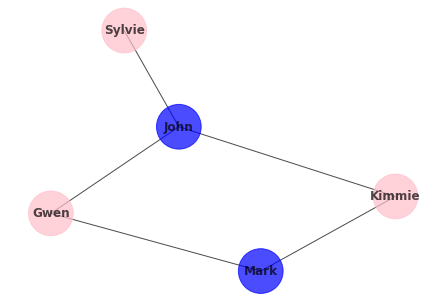

In [7]:
s_people = ['John','Gwen','Kimmie', 'Mark','Sylvie']
s_colors = ['blue','pink','pink','blue','pink']

s_relations = {"John":['Gwen','Kimmie'],
              "Mark":["Gwen",'Kimmie'],
              'Sylvie':['John']}

Gs = nx.Graph()
for person in s_people:
    Gs.add_node(person)

for p1 in s_relations:
    p2s = s_relations[p1]
    
    for p2 in p2s:
        Gs.add_edge(p1,p2)
        
nx.draw(Gs, 
        with_labels=True,
        node_color=s_colors,#'aqua',
        node_size=2000,
        alpha=0.7, 
        font_weight='bold')

In [8]:
s_central =pd.DataFrame(Gs.degree(), columns=['Node','Degree'])\
            .sort_values('Degree',ascending=False)
s_central

,Node,Degree
0,John,3
1,Gwen,2
2,Kimmie,2
3,Mark,2
4,Sylvie,1


In [10]:
max_degree = s_central['Degree'].sum()
s_central.set_index('Node').iplot(kind='bar',
                                 title=f"Node Centrality by Degree (Total Degrees = {max_degree}",
                                  yTitle='Degrees',theme='solar')

In [11]:
def get_degrees(Gs, plot=True):
    s_central =pd.DataFrame(Gs.degree(), columns=['Node','Degree'])\
                .sort_values('Degree',ascending=False)

    max_degree = s_central['Degree'].sum()
    
    if plot:
        s_central.set_index('Node').iplot(kind='bar',
                                     title=f"Node Centrality by Degree (Total Degrees = {max_degree}",
                                      yTitle='Degrees',theme='solar')
    return s_central

In [13]:
s_central = get_degrees(Gs)
s_central

,Node,Degree
0,John,3
1,Gwen,2
2,Kimmie,2
3,Mark,2
4,Sylvie,1


//anaconda3/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



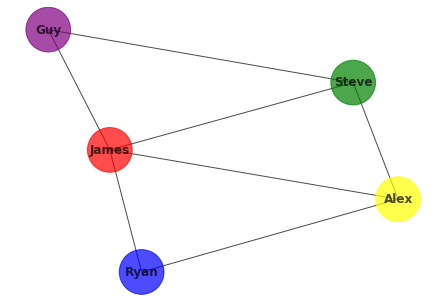

In [14]:
## Homosexual Drama
g_people = ['James','Alex','Ryan','Steve','Guy']
g_colors= ['red','yellow','blue','green',
          'purple']
g_relations = {'James':['Alex','Ryan','Steve'],
              "Alex":['James','Ryan','Steve'],
              'Guy':['James','Steve']}

Gg = nx.Graph()
for person in g_people:
    Gg.add_node(person)

for p1 in g_relations:
    p2s = g_relations[p1]
    
    for p2 in p2s:
        Gg.add_edge(p1,p2)
        
nx.draw(Gg, 
        with_labels=True,
        node_color=g_colors,#'aqua',
        node_size=2000,
        alpha=0.7, 
        font_weight='bold')

In [16]:
g_central = get_degrees(Gg)
g_central

,Node,Degree
0,James,4
1,Alex,3
3,Steve,3
2,Ryan,2
4,Guy,2


#### Now, onto hypothetical connectivity

- One potential source of drama is the number of possible romantic entanglements in homosexual vs hetereosexual relationships

In [17]:
## what if everyone slept with everyone?
import itertools

girls=[person for i,person in enumerate(s_people)  if s_colors[i]=='pink']
boys=[person for i,person in enumerate(s_people)  if s_colors[i]=='blue']
print(girls,boys)

['Gwen', 'Kimmie', 'Sylvie'] ['John', 'Mark']


//anaconda3/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



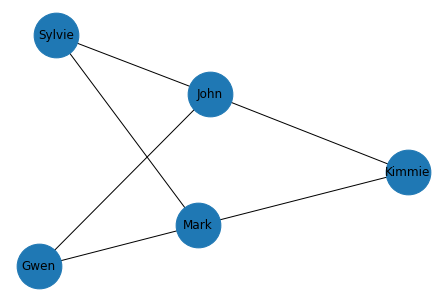

In [18]:
G = nx.Graph()
combs = list(itertools.product(girls,boys))
[G.add_edge(*x) for x in combs]
nx.draw(G, with_labels=True, node_size=2000)

In [19]:
get_degrees(G)

,Node,Degree
1,John,3
2,Mark,3
0,Gwen,2
3,Kimmie,2
4,Sylvie,2


In [20]:
gboys =list(itertools.product(g_people,g_people))
print(gboys)

[('James', 'James'), ('James', 'Alex'), ('James', 'Ryan'), ('James', 'Steve'), ('James', 'Guy'), ('Alex', 'James'), ('Alex', 'Alex'), ('Alex', 'Ryan'), ('Alex', 'Steve'), ('Alex', 'Guy'), ('Ryan', 'James'), ('Ryan', 'Alex'), ('Ryan', 'Ryan'), ('Ryan', 'Steve'), ('Ryan', 'Guy'), ('Steve', 'James'), ('Steve', 'Alex'), ('Steve', 'Ryan'), ('Steve', 'Steve'), ('Steve', 'Guy'), ('Guy', 'James'), ('Guy', 'Alex'), ('Guy', 'Ryan'), ('Guy', 'Steve'), ('Guy', 'Guy')]


//anaconda3/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



,Node,Degree
0,Alex,6
1,Guy,6
2,James,6
3,Ryan,6
4,Steve,6


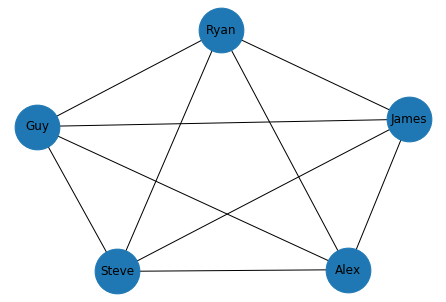

In [21]:
G = nx.Graph()
[G.add_edge(*x) for x in set(gboys)]

nx.draw(G, with_labels=True, node_size=2000)
get_degrees(G)

# Activity: Node Centrality Lab
- Inside repo: "/labs_from_class/sect_42"

## Post-Activity Commentary:

- Q: In what areas could you see this analysis being applied?

- A: Marketing- finding social influencers.
    - Recommendation systems

# Appendix - Airline Activity

- https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/

In [22]:
from fsds_100719.imports import *

In [25]:
df = pd.read_csv('datasets/Airlines.csv')
# df.columns= [col.lower() for col in df.columns]
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,2013,2,26,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946
1,2013,8,17,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076
2,2013,2,13,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402
3,2013,4,11,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626
4,2013,8,5,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422


In [26]:
import networkx as nx

In [27]:
df_graph = nx.from_pandas_edgelist(df,
                                   source='origin',
                                   target='dest',
                                  edge_attr=True)

In [28]:
df_graph.nodes

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [29]:
df_graph.edges

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

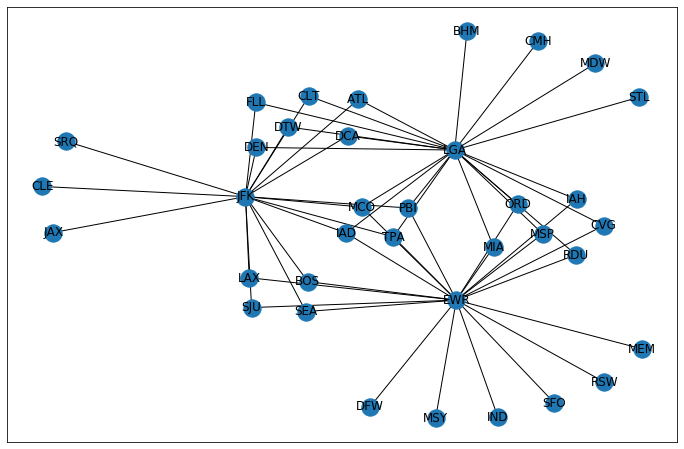

In [30]:
fig,ax=plt.subplots(figsize=(12,8))
nx.draw_networkx(df_graph,ax=ax)

In [31]:
df_deg = pd.DataFrame(df_graph.degree,
             columns=['Node','Degree'])
df_deg.sort_values('Degree',
                   ascending=False).head()

,Node,Degree
0,EWR,20
2,LGA,20
5,JFK,17
15,TPA,3
9,PBI,3


In [32]:
def get_centrality(G,show=True,return_=True,plot=True):
    """Calcualtes all measures of centrality and creates a datafrane and iplot of results."""
    df_res = pd.DataFrame(G.degree(),columns=['Node','degree'])
    
    closeness = pd.Series(nx.closeness_centrality(G),name='closeness')
    between = pd.Series(nx.betweenness_centrality(G),name='betweeness')
    eigen = pd.Series(nx.eigenvector_centrality(G),name='eigenvector')

    df_res=df_res.set_index('Node')
    df_res=pd.concat([df_res,closeness,between,eigen],axis=1)
    
    if show:
        display(df_res.style.background_gradient('Greens'))        

    if plot:
        df_res.iplot(kind='bar',title='Node Centrality Measures')

    if return_:
        return df_res
    

        

In [33]:
df_res = get_centrality(df_graph)


,degree,closeness,betweeness,eigenvector
Node,,,,
EWR,20,0.555556,0.447339,0.412704
MEM,1,0.360825,0,0.0671159
LGA,20,0.555556,0.409524,0.439292
FLL,2,0.432099,0.00728291,0.131567
SEA,2,0.454545,0.0120448,0.127243
JFK,17,0.507246,0.309524,0.369731
DEN,2,0.432099,0.00728291,0.131567
ORD,2,0.466667,0.0114846,0.138556
MIA,2,0.466667,0.0114846,0.138556


In [34]:
# import ipywidgets as widgets
# from ipywidgets import interact

# @interact
# def sort_res(column = df_res.columns,top_n=(3,len(df_res)),kind=['bar','barh']):
#     fig,ax = plt.subplots(figsize=(12,12))
#     df_res.sort_values(column).head(top_n).plot(kind=kind,ax=ax)